### Hours Vs Marks

In [61]:
import numpy as np
from matplotlib import pyplot as plt

#### Load DataSet

In [62]:
# Features: [Hours of Study, Hours of Sleep]
X = np.array([
    [2, 8],
    [3, 7],
    [4, 6],
    [5, 5],
    [6, 4],
    [7, 3],
    [8, 2],
    [9, 1]
])

# Target: Final exam score out of 100
y = np.array([50, 55, 60, 65, 70, 75, 80, 85])


#### Predict Model

In [63]:
def make_prediction(x, w, b):
    return np.dot(x, w) + b

#### Square Error Function

In [64]:
def cost_error(x, y, w, b):
    m = x.shape[0]
    prediction = make_prediction(x, w, b)
    error = prediction - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

#### Compute Gradient Decent

In [65]:
def compute_gradient_descent(x, y, w, b):
    m = x.shape[0]
    prediction = make_prediction(x,w,b)
    error = prediction - y
    dj_dw = (1/m) * (x.T @ error)
    dj_db = (1/m) * np.sum(error)
    return dj_dw,dj_db

#### Gradient Decent

In [66]:
def gradient_descent(x, y, w_init, b_init, iter, alpha):
    w = w_init.copy()
    b = b_init
    cost_hist = []

    for i in range(iter):
        dj_dw,dj_db = compute_gradient_descent(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 100 == 0 or i == iter-1:
            cost = cost_error(x, y, w, b)
            cost_hist.append(cost)
            print(f"iterations {i} : cost = {cost:.4f}, w = {w}, b = {b:.4f}")

    return w, b, cost_hist



#### Testing the model

In [85]:
# Features: [Hours of Study, Hours of Sleep]
X = np.array([
    [2, 8],
    [3, 7],
    [4, 6],
    [5, 5],
    [6, 4],
    [7, 3],
    [8, 2],
    [9, 1]
])

# Target: Final exam score out of 100
y = np.array([50, 55, 60, 65, 70, 75, 80, 85])

mu = np.mean(X, axis=0)
sigma = np.std(X, axis = 0)
X_scaled = (X - mu) / sigma

w_init = np.zeros(X.shape[1])
b_init = 0
alpha = 0.01
iter = 1000

w_final,b_final, cost_hist = gradient_descent(X_scaled, y, w_init, b_init, iter, alpha)

predictions = make_prediction(X_scaled, w_final, b_final)



iterations 0 : cost = 2295.8166, w = [ 0.11456439 -0.11456439], b = 0.6750
iterations 100 : cost = 300.2570, w = [ 4.98373916 -4.98373916], b = 43.0399
iterations 200 : cost = 40.0993, w = [ 5.62948695 -5.62948695], b = 58.5468
iterations 300 : cost = 5.3702, w = [ 5.71512574 -5.71512574], b = 64.2228
iterations 400 : cost = 0.7195, w = [ 5.72648311 -5.72648311], b = 66.3005
iterations 500 : cost = 0.0964, w = [ 5.72798932 -5.72798932], b = 67.0609
iterations 600 : cost = 0.0129, w = [ 5.72818908 -5.72818908], b = 67.3393
iterations 700 : cost = 0.0017, w = [ 5.72821557 -5.72821557], b = 67.4412
iterations 800 : cost = 0.0002, w = [ 5.72821908 -5.72821908], b = 67.4785
iterations 900 : cost = 0.0000, w = [ 5.72821955 -5.72821955], b = 67.4921
iterations 999 : cost = 0.0000, w = [ 5.72821961 -5.72821961], b = 67.4971


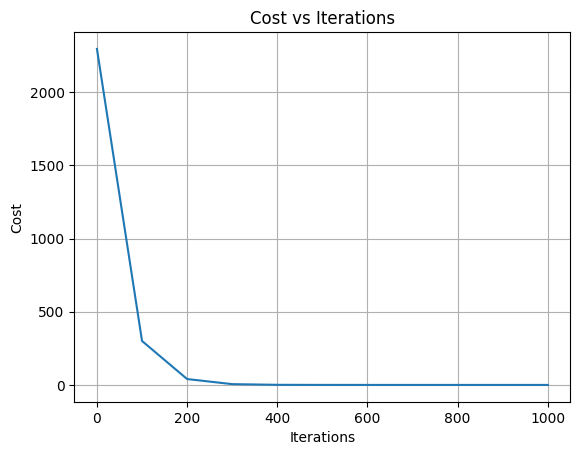

In [86]:
plt.plot(range(0, len(cost_hist) * 100, 100), cost_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.grid(True)
plt.show()

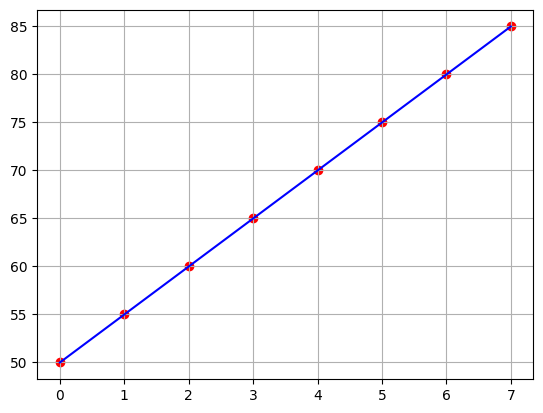

In [87]:
plt.scatter(range(len(y)), y, c='red', label='Actual')
plt.plot(range(len(predictions)), predictions, c='blue', label='predictions')
plt.grid(True)